In [7]:
!pip install kaggle


In [8]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle competitions download -c cifar-10

 98% 698M/715M [00:04<00:00, 117MB/s]
100% 715M/715M [00:04<00:00, 167MB/s]


In [10]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [11]:
from zipfile import ZipFile
file_name = "/content/cifar-10.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [12]:
!ls

cifar-10.zip  sample_data	    test.7z   trainLabels.csv
kaggle.json   sampleSubmission.csv  train.7z


In [13]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.4/96.4 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.9/412.9 kB 22.0 MB/s eta 0:00:00


In [14]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()
archive.close()

In [15]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


Importing the dependencies

In [16]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split



In [17]:
filename = os.listdir('/content/train')

In [18]:
type(filename)

list

In [19]:
len(filename)

50000

In [20]:
print(filename[0:5])

['43926.png', '48780.png', '31482.png', '46200.png', '48169.png']


Labels Processing

In [21]:
lable_df = pd.read_csv('/content/trainLabels.csv')

In [22]:
lable_df.shape

(50000, 2)

In [23]:
lable_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [24]:
lable_df.value_counts('label')

,count
label,
airplane,5000
automobile,5000
bird,5000
cat,5000
deer,5000
dog,5000
frog,5000
horse,5000
ship,5000


Manually encoding the lable values

In [25]:
lables_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

In [26]:
lables = [lables_dictionary[i] for i in lable_df['label']]

In [27]:
print(lables[0:5])

[6, 9, 9, 4, 1]


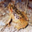

In [28]:
#Checking an sample image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/7796.png')

cv2_imshow(img)

In [29]:
id_list = list(lable_df['id'])

In [30]:
print(id_list[0:5])

[1, 2, 3, 4, 5]


Image Processing

In [31]:
#convert images to numpy array

train_data_folder = '/content/train/'

data = []

for id in id_list:
  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [32]:
type(data)

list

In [33]:
len(data)

50000

In [34]:
data[0].shape

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
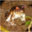

In [35]:
data[0]

In [36]:
#convert images list and lable list to numpy array

X = np.array(data)
y = np.array(lables)

In [37]:
print(X.shape)
print(y.shape)

(50000, 32, 32, 3)
(50000,)


Train Test Split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
#Scaling the data

X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [40]:
X_test_scaled

array([[[[0.7254902 , 0.7254902 , 0.69803922],
         [0.70196078, 0.69019608, 0.64313725],
         [0.7372549 , 0.71764706, 0.65098039],
         ...,
         [0.51372549, 0.47843137, 0.41960784],
         [0.62745098, 0.59607843, 0.55294118],
         [0.79215686, 0.77647059, 0.75686275]],

        [[0.71764706, 0.72156863, 0.70588235],
         [0.71372549, 0.70588235, 0.67058824],
         [0.76862745, 0.75294118, 0.69411765],
         ...,
         [0.5254902 , 0.48627451, 0.42745098],
         [0.62352941, 0.59215686, 0.54901961],
         [0.80392157, 0.78431373, 0.76470588]],

        [[0.71764706, 0.7254902 , 0.72156863],
         [0.71372549, 0.70980392, 0.68627451],
         [0.77647059, 0.76470588, 0.72156863],
         ...,
         [0.50980392, 0.47058824, 0.41176471],
         [0.60392157, 0.57254902, 0.52941176],
         [0.8       , 0.78431373, 0.76470588]],

        ...,

        [[0.42352941, 0.43921569, 0.44705882],
         [0.42352941, 0.43921569, 0.44705882]

Building the neural network

In [41]:
import tensorflow as tf
from tensorflow import keras


In [42]:
num_of_classes = 10

#setting up the layers of Neural Neywork

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(32,32,3)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(num_of_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [43]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [44]:
model.fit(X_train_scaled, y_train,validation_split = 0.1, epochs=20)

Epoch 1/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.2616 - loss: 2.0524 - val_accuracy: 0.3315 - val_loss: 1.8513
Epoch 2/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.3565 - loss: 1.8073 - val_accuracy: 0.3767 - val_loss: 1.7498
Epoch 3/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.3757 - loss: 1.7467 - val_accuracy: 0.3943 - val_loss: 1.7073
Epoch 4/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.3897 - loss: 1.7061 - val_accuracy: 0.3812 - val_loss: 1.7705
Epoch 5/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.3959 - loss: 1.6883 - val_accuracy: 0.3887 - val_loss: 1.6886
Epoch 6/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.4039 - loss: 1.6587 - val_accuracy: 0.3925 - val_loss: 1.6706
Epoch 7/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.4090 - loss: 1.6500 - val_accuracy: 0.4130 - val_loss: 1.6486
Epoch 8/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.4119 - loss: 1.6474

**RestNet50**

In [45]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Flatten,  Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [46]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [47]:
convolutional_base.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [48]:
num_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [49]:
model.compile(optimizer=optimizers.RMSprop(learning_rate = 2e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_scaled, y_train,validation_split = 0.1, epochs=10)

In [ ]:
h = history


#plot the loss value

plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()


#plot the accuracy value

plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()